# Experimenting with Convolutional Neural Network with MNIST dataset

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# keras
from keras.models import Sequential
from keras.layers import MaxPool2D, Dense, Activation, Conv2D, Flatten

In [6]:
mnist = input_data.read_data_sets("./mnist")

Extracting ./mnist/train-images-idx3-ubyte.gz
Extracting ./mnist/train-labels-idx1-ubyte.gz
Extracting ./mnist/t10k-images-idx3-ubyte.gz
Extracting ./mnist/t10k-labels-idx1-ubyte.gz


In [7]:
x, y = mnist.train.next_batch(30)

In [12]:
x.shape, y.shape

((30, 784), (30,))

In [11]:
im = np.reshape(x[0], (28,28))

In [13]:
im.shape

(28, 28)

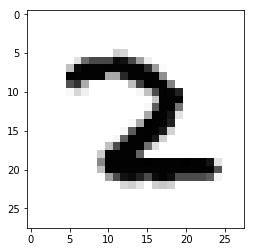

In [16]:
plt.imshow(im, cmap="Greys")
plt.show()

# Model

In [54]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(26,26,1)))
model.add(Flatten())
model.add(Dense(50, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", )

In [55]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
flatten_8 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 50)                921650    
_________________________________________________________________
dense_16 (Dense)             (None, 10)                510       
Total params: 931,728
Trainable params: 931,728
Non-trainable params: 0
_________________________________________________________________


In [56]:
def make_batch(size):
    while(True):
        x, y = mnist.train.next_batch(size)
        yield x.reshape((-1,28,28,1)), y

In [59]:
batch_size = 100
model.fit_generator(make_batch(batch_size),
                    steps_per_epoch= mnist.train.num_examples // batch_size,
                    epochs=1,
#                     metrics = ['accuracy']
                   )

Epoch 1/1
550/550 [==============================] - 224s - loss: 0.0409   


In [60]:
x_test, y_test = mnist.test.images,mnist.test.labels
y_pred = model.predict_classes(x_test.reshape((-1,28,28,1)))
np.count_nonzero(y_pred == y_test)/len(y_test)

 9952/10000 [============================>.] - ETA: 0s

0.9861